In [1]:
import pandas as pd
from pandas.plotting import table

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations # itertools - сборник полезных итераторов
from scipy.stats import ttest_ind

import warnings
warnings.simplefilter('ignore')

In [2]:
pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок

In [3]:
students = pd.read_csv('stud_math.csv')
stud_work = students.copy()

## Легенда
    1 school — аббревиатура школы, в которой учится ученик
    2 sex — пол ученика ('F' - женский, 'M' - мужской)
    3 age — возраст ученика (от 15 до 22)
    4 address — тип адреса ученика ('U' - городской, 'R' - за городом)
    5 famsize — размер семьи('LE3' <= 3, 'GT3' >3)
    6 Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)
    7 Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)
    8 Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)
    9 Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)
    10 Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)
    11 reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)
    12 guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)
    13 traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)
    14 studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)
    15 failures — количество внеучебных неудач (n, если 1<=n<=3, иначе 0)
    16 schoolsup — дополнительная образовательная поддержка (yes или no)
    17 famsup — семейная образовательная поддержка (yes или no)
    18 paid — дополнительные платные занятия по математике (yes или no)
    19 activities — дополнительные внеучебные занятия (yes или no)
    20 nursery — посещал детский сад (yes или no)
    21 higher — хочет получить высшее образование (yes или no)
    22 internet — наличие интернета дома (yes или no)
    23 romantic — в романтических отношениях (yes или no)
    24 famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)
    25 freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)
    26 goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)
    27 health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)
    28 absences — количество пропущенных занятий
    29 score — баллы по госэкзамену по математике

### Цели и задачи
#### Определить данные, которые, возможно, оказывают влияние на оценку по математике (столбец score).

## Функции для первичной обработки данных

In [4]:
#Функция подсчета количества уникальных значений в столбцах
def object_data (data):
    columns = data.columns
    for i in columns:
        row = []
        if data[i].dtype == 'O':
            row.append(['count_of_observation', len(data[i])])
            row.append(['count_of_NaN', data[i].isnull().sum()])
            for j in range(len(data[i].value_counts())):
                row.append([list(data[i].value_counts().index)[j], list(data[i].value_counts())[j]])
            result = pd.DataFrame(row)
            print(i)
            print(result)
            print('')

In [5]:
# Функция замены категориальных данных на числовые значения
def change_values (values):
    if values == 'teacher':
        values = 0
    elif values == 'health':
        values = 1
    elif values == 'services':
        values = 2
    elif values == 'at_home':
        values = 3
    elif values == 'other':
        values = 4
    return values

In [6]:
#Функция построения графиков
def gist_draw (data):
    columns = data.columns
    for i in columns:
        if data[i].dtype == 'int64' or data[i].dtype == 'float64':
            row = []
            row.append(['count_of_observation', len(data[i])])
            row.append(['count_of_NaN', data[i].isnull().sum()])
            for j in range(len(data[i].describe())):
                row.append([list(data[i].describe().index)[j], list(data[i].describe().round(3))[j]])
            result = pd.DataFrame(data = row)
            x_right = data[i].max() * 2
            if data[i].max() < 0:
                loc_table = 2
            else: loc_table = 1
            fig, axes = plt.subplots (1,1)
            table(axes, result, loc = loc_table, colWidths=[0.3, 0.1, 0.9]) #добавление таблицы с данными в график
            data[i].plot(kind = 'hist', xlim = (0, x_right),  legend=None, title = i)            

In [7]:
#Построение графиков типа Boxplot
def get_boxplot(data):
    columns = data.columns
    for i in columns[:-2]:
        for_plot = data[i].value_counts()
        fig, ax = plt.subplots(figsize = (16, 8))
        sns.boxplot(x=data[i], y=data['score'],data=data[data[i].isin(data[i].value_counts())], ax=ax)
        ax.set_title('Boxplot for ' + i)
        plt.show()        

## Работа с данными

In [8]:
stud_work.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


In [9]:
stud_work.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

### Определение количесва уникальных и пропущенных значений в столбцах с типом данных object

In [10]:
object_data(stud_work)

school
                      0    1
0  count_of_observation  395
1          count_of_NaN    0
2                    GP  349
3                    MS   46

sex
                      0    1
0  count_of_observation  395
1          count_of_NaN    0
2                     F  208
3                     M  187

address
                      0    1
0  count_of_observation  395
1          count_of_NaN   17
2                     U  295
3                     R   83

famsize
                      0    1
0  count_of_observation  395
1          count_of_NaN   27
2                   GT3  261
3                   LE3  107

Pstatus
                      0    1
0  count_of_observation  395
1          count_of_NaN   45
2                     T  314
3                     A   36

Mjob
                      0    1
0  count_of_observation  395
1          count_of_NaN   19
2                 other  133
3              services   98
4               at_home   58
5               teacher   55
6                health   3

#### По полученным материалам видно, что во многих столбцах присутствует доминирующее наблюдение.

### Работа с количественными данными

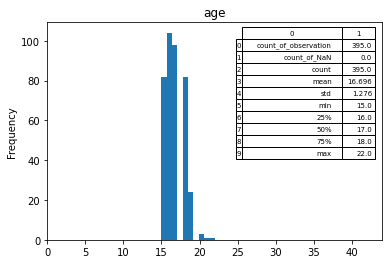

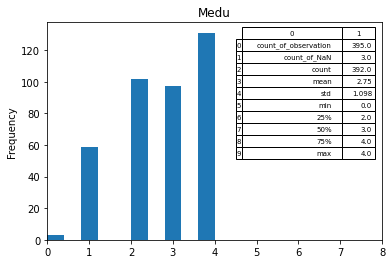

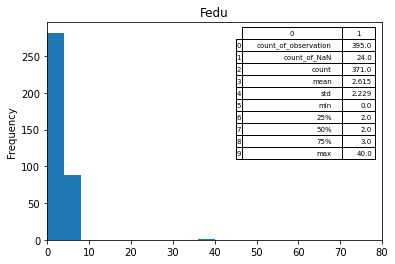

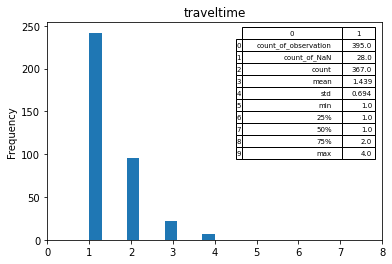

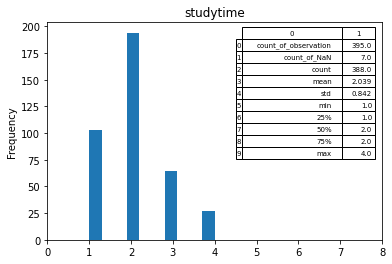

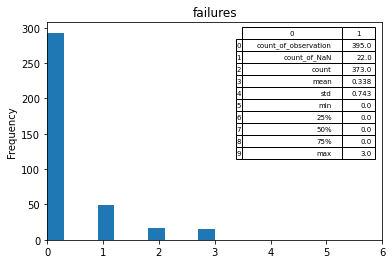

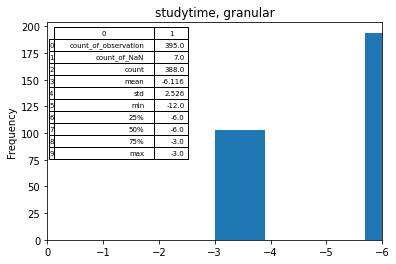

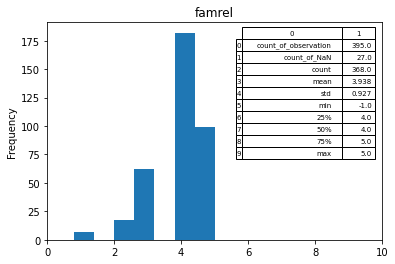

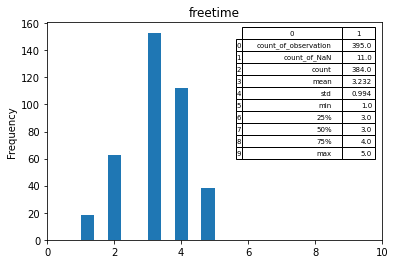

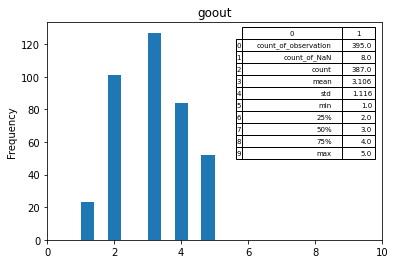

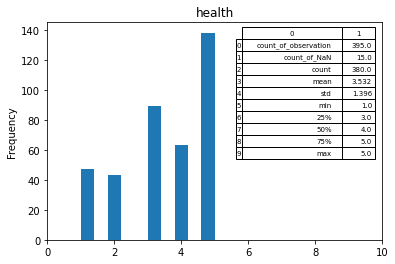

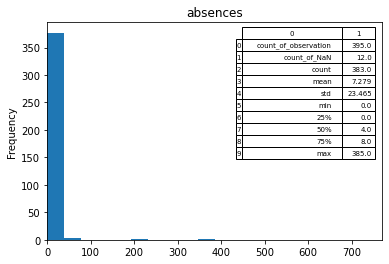

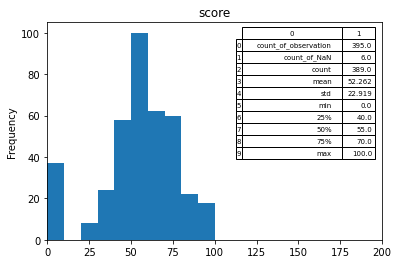

In [11]:
gist_draw(stud_work)

#### Фильтрация выбросов

In [12]:
# В столбце Fedu есть явный выброс (max = 40). Максимальная величина значения в столбце - 4. 
# Заменим все значения больше 4 на 3 (ближе к среднему 2.615).
stud_work['Fedu'] = stud_work['Fedu'].apply(lambda x:3 if x > 4 else x)
stud_work['Fedu'].describe()

count    371.000000
mean       2.514825
std        1.086363
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        4.000000
Name: Fedu, dtype: float64

In [13]:
# В столбце famrel есть явный выброс (min = -1). Минимальная величина значения в столбце - 1. 
# Заменим все значения меньше 1 на 4 (ближе к среднему 3.938).
stud_work['famrel'] = stud_work['famrel'].apply(lambda x:4 if x < 1 else x)
stud_work['famrel'].describe()

count    368.000000
mean       3.951087
std        0.890641
min        1.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: famrel, dtype: float64

In [14]:
# В столбце absences присутствуют выбросы. Воспользуемся функцией фильтрации выбросов с помощью квартилей. 
# Значения выбросов заменим на 4 (медиана)
IQR = stud_work['absences'].quantile(0.75) - stud_work['absences'].quantile(0.25)
perc75 = stud_work['absences'].quantile(0.75)
filtr = perc75 + 1.5*IQR
stud_work['absences'] = stud_work['absences'].apply(lambda x:4 if x > filtr else x)
stud_work['absences'].describe()

count    383.000000
mean       4.577023
std        4.855363
min        0.000000
25%        0.000000
50%        4.000000
75%        6.000000
max       20.000000
Name: absences, dtype: float64

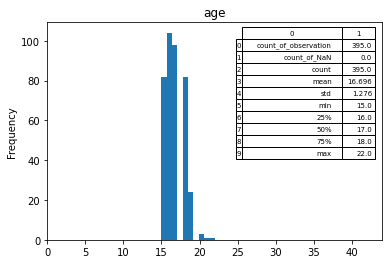

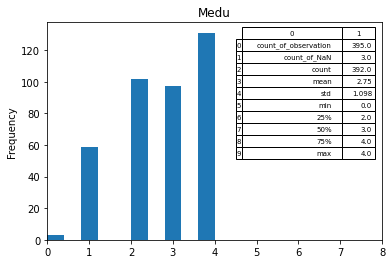

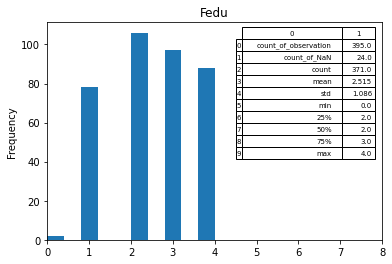

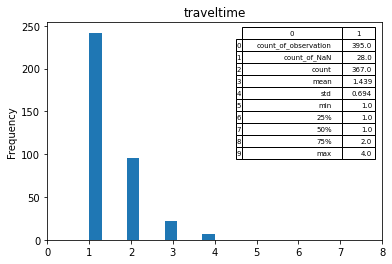

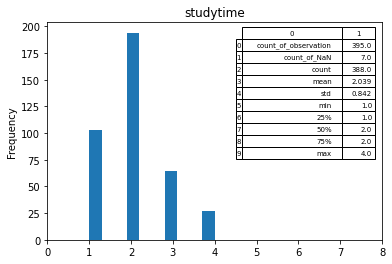

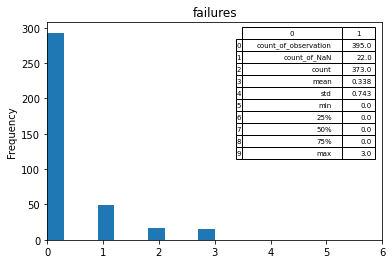

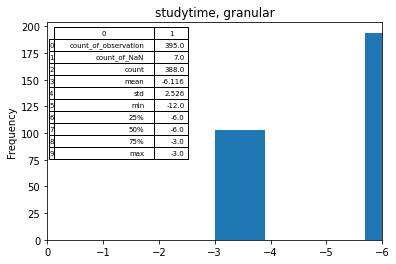

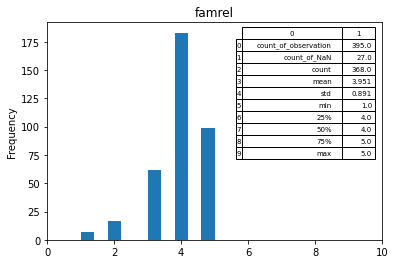

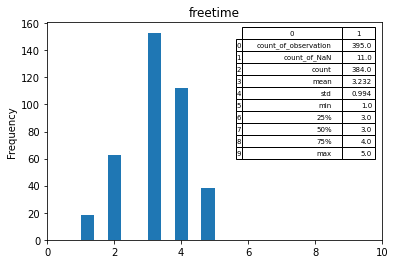

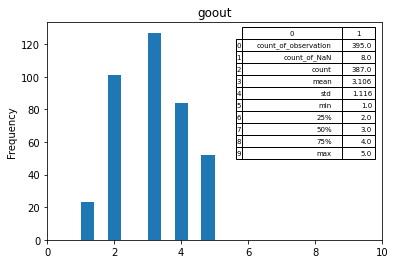

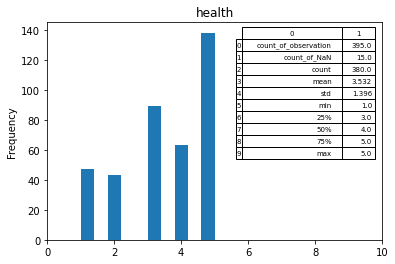

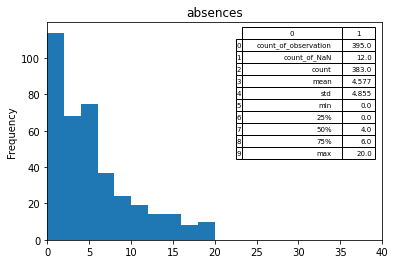

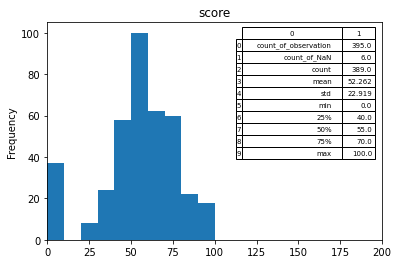

In [15]:
#Данные после фильтрации
gist_draw(stud_work)

### Корреляционный анализ данных

In [16]:
# для включения в корреляционный анализ данных Mjob и Fjob заменим выражения на цифры.
stud_work['Mjob'] = stud_work['Mjob'].apply(change_values)
stud_work['Fjob'] = stud_work['Fjob'].apply(change_values)

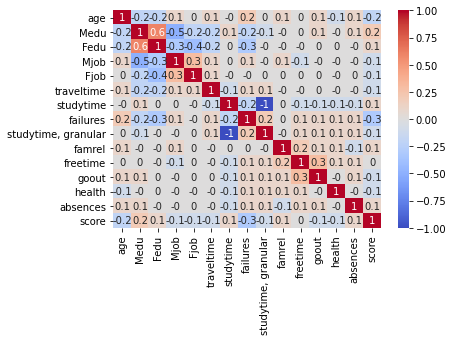

In [17]:
correlation = stud_work.corr().round(1)
sns.heatmap(correlation, annot = True, cmap = 'coolwarm')

In [18]:
# Анализ показывает, что данные столбцов studytime и studytime, granular коррелируются полностью.
# Исключим столбец studytime, granular из анализа
stud_work = stud_work.drop(columns=['studytime, granular'])

#### Присутствует корреляционная зависимость между столбцами Fedu,  Medu, Mjob, Fjob . 

#### Значение "0" в кореляционной зависимость между столбцами score и freetime говорит об отсутствии взаимосвязи. Столбец freetime исключим из анализа.
#### Максимальное влияние на данные в столбце score оказывают данные из столбца failures (количество внеучебных неудач). Эта связь обратнопропорциональна (чем больше неудач, тем меньше вероятность хорошо сдать экзамен).

In [19]:
stud_work = stud_work.drop(columns=['freetime'])

In [20]:
stud_work.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 28 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      395 non-null    object 
 1   sex         395 non-null    object 
 2   age         395 non-null    int64  
 3   address     378 non-null    object 
 4   famsize     368 non-null    object 
 5   Pstatus     350 non-null    object 
 6   Medu        392 non-null    float64
 7   Fedu        371 non-null    float64
 8   Mjob        376 non-null    float64
 9   Fjob        359 non-null    float64
 10  reason      378 non-null    object 
 11  guardian    364 non-null    object 
 12  traveltime  367 non-null    float64
 13  studytime   388 non-null    float64
 14  failures    373 non-null    float64
 15  schoolsup   386 non-null    object 
 16  famsup      356 non-null    object 
 17  paid        355 non-null    object 
 18  activities  381 non-null    object 
 19  nursery     379 non-null    o

### Анализ категориальных данных

In [21]:
# рассмотрим категориальные данные для 46 наблюдений по school MS
school_ms = stud_work[stud_work['school'] == 'MS']
object_data(school_ms)

school
                      0   1
0  count_of_observation  46
1          count_of_NaN   0
2                    MS  46

sex
                      0   1
0  count_of_observation  46
1          count_of_NaN   0
2                     F  25
3                     M  21

address
                      0   1
0  count_of_observation  46
1          count_of_NaN   5
2                     R  23
3                     U  18

famsize
                      0   1
0  count_of_observation  46
1          count_of_NaN   2
2                   GT3  28
3                   LE3  16

Pstatus
                      0   1
0  count_of_observation  46
1          count_of_NaN   2
2                     T  42
3                     A   2

reason
                      0   1
0  count_of_observation  46
1          count_of_NaN   4
2                course  18
3                  home  10
4                 other   9
5            reputation   5

guardian
                      0   1
0  count_of_observation  46
1          count_of

#### Выборка по school MS по категориальным данным не выявила особых отклонений распределения от выборке по всем значениям столбца school. Основные отличия распределения категориальных данных 
1. большая часть студентов из school MS, попавшие в выборку, живут за городом;
2. процент детей, ходивших в детский сад (nursery) больше, чем в основной выборке;

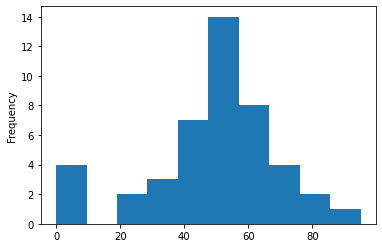

In [22]:
# рассмотрим оценки для school MS
school_ms['score'].plot(kind = 'hist')

#### Форма распределение соответствует форме общей выборки. Можно считать, что school MS не влияет на общее распределение оценок. Это может быть связано с малым количеством наблюдений.

### Проведем анализ данных с помощью графиков Boxplot (в анализ не включены столбцы age и absences, так как в них приведены количественные данные) 

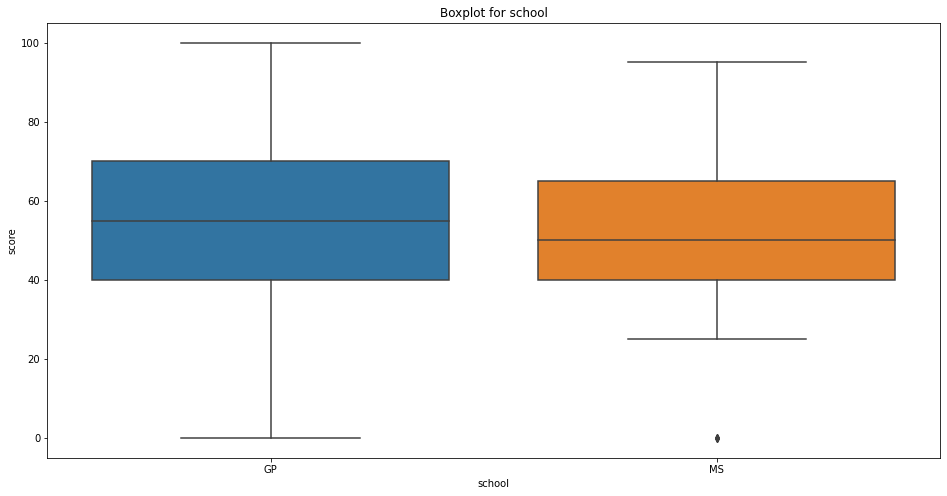

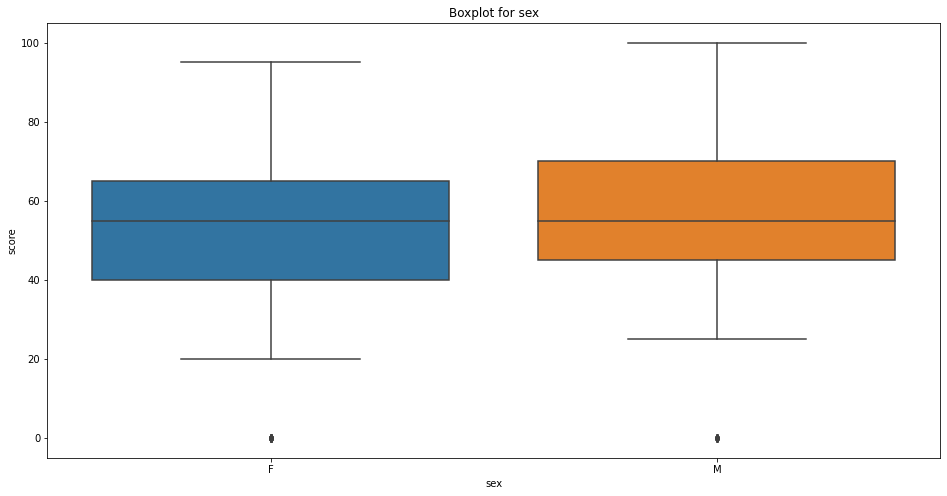

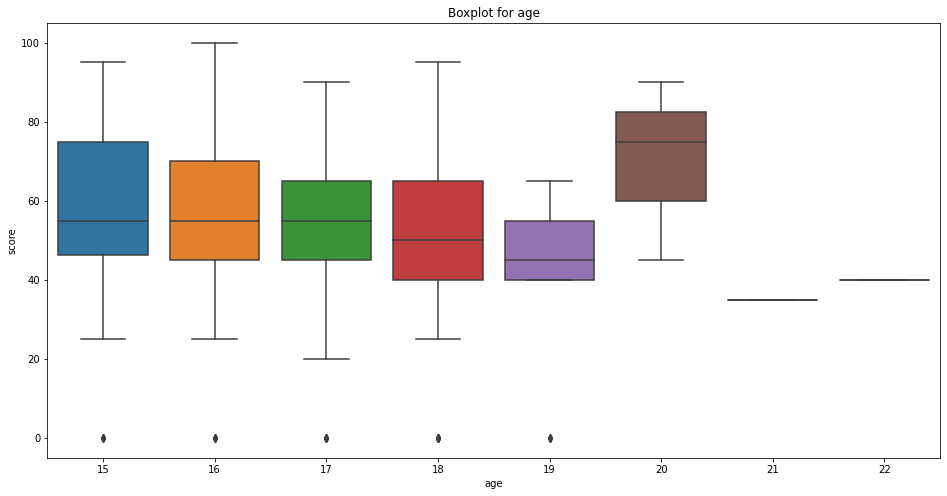

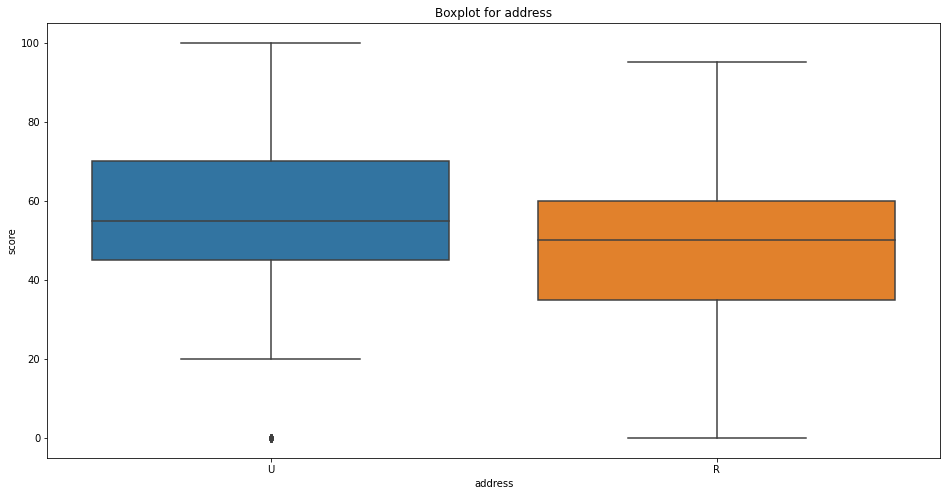

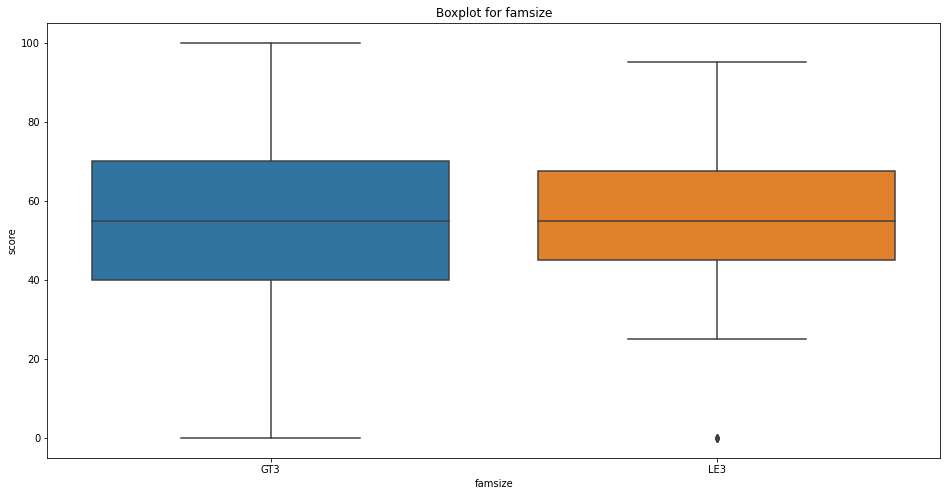

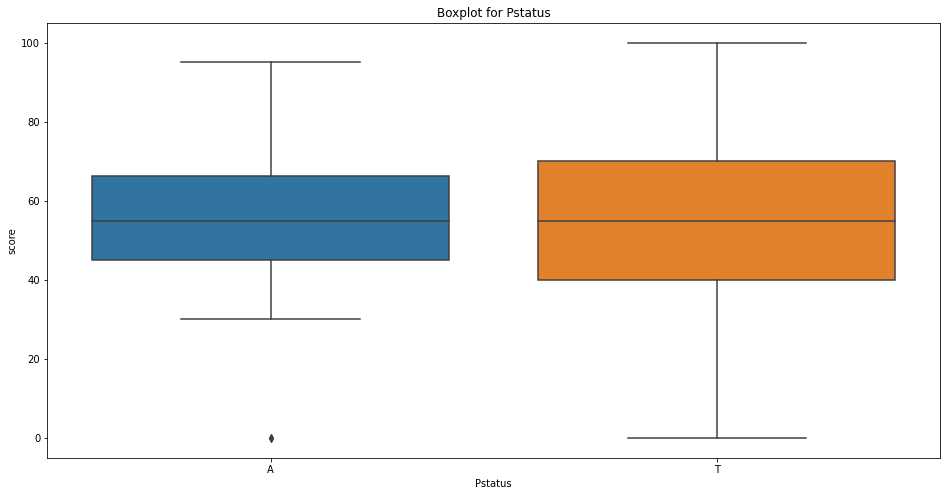

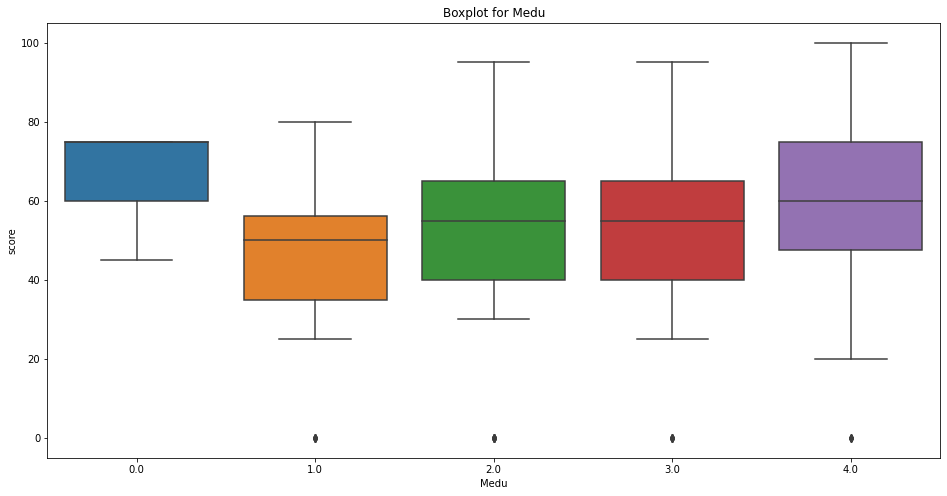

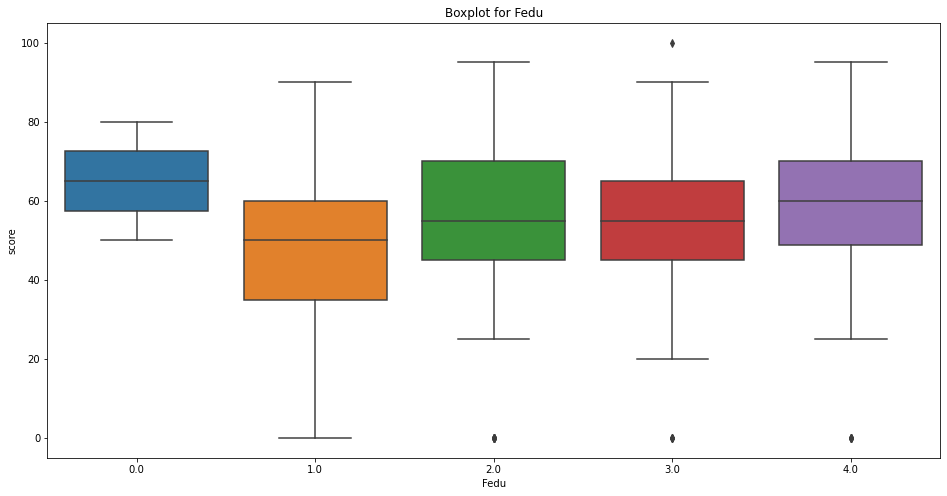

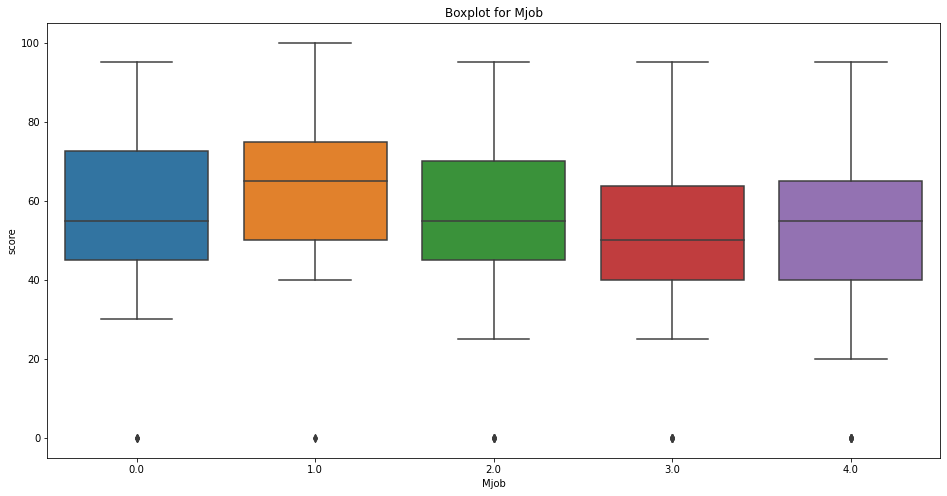

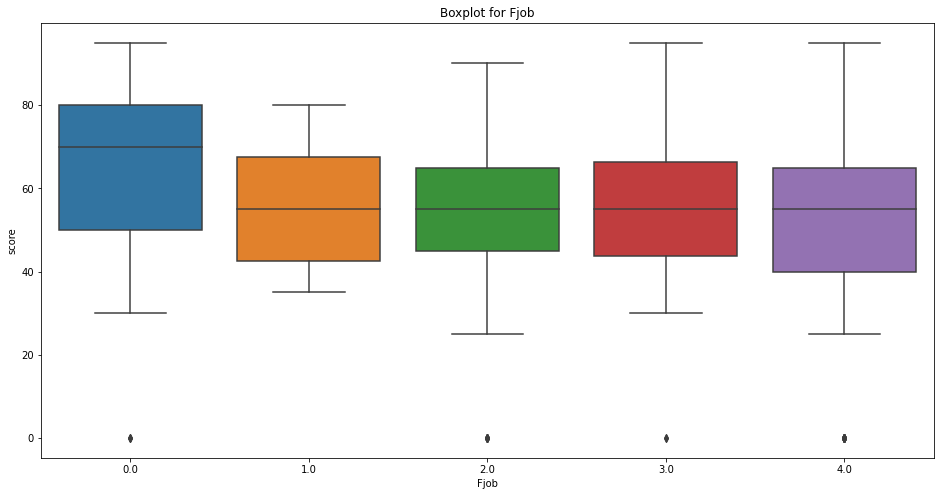

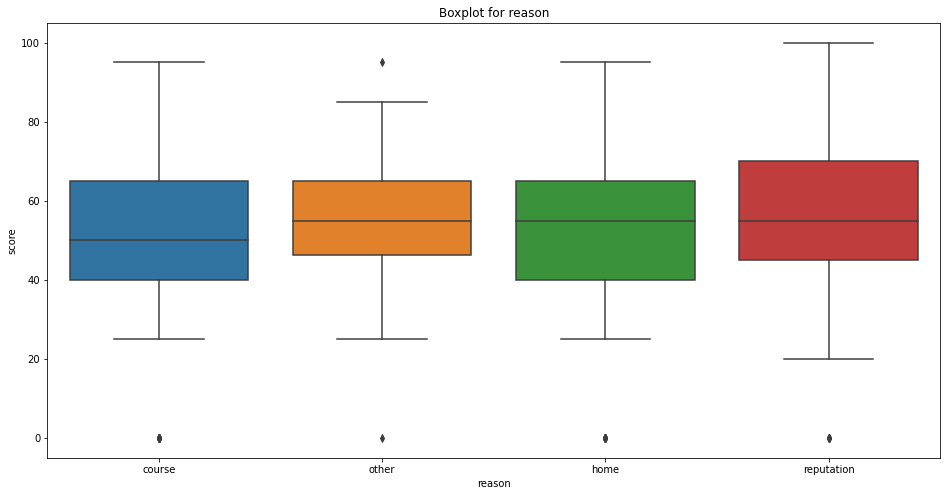

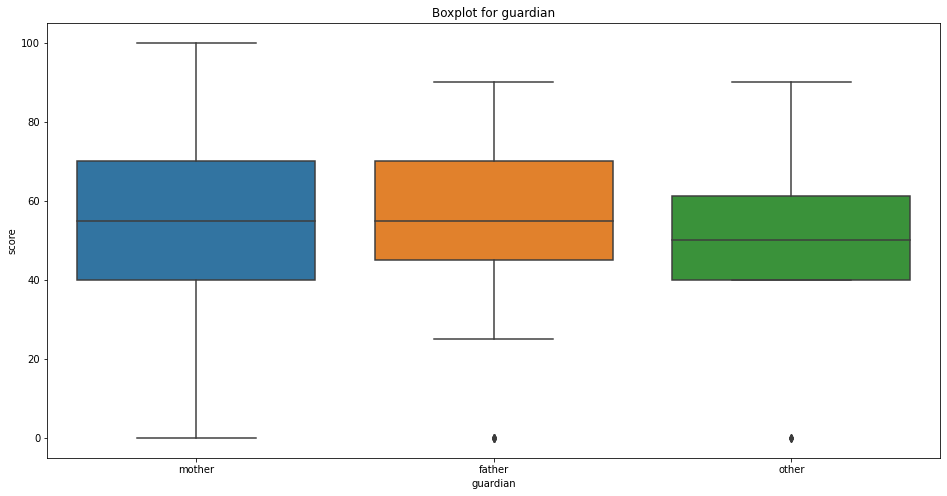

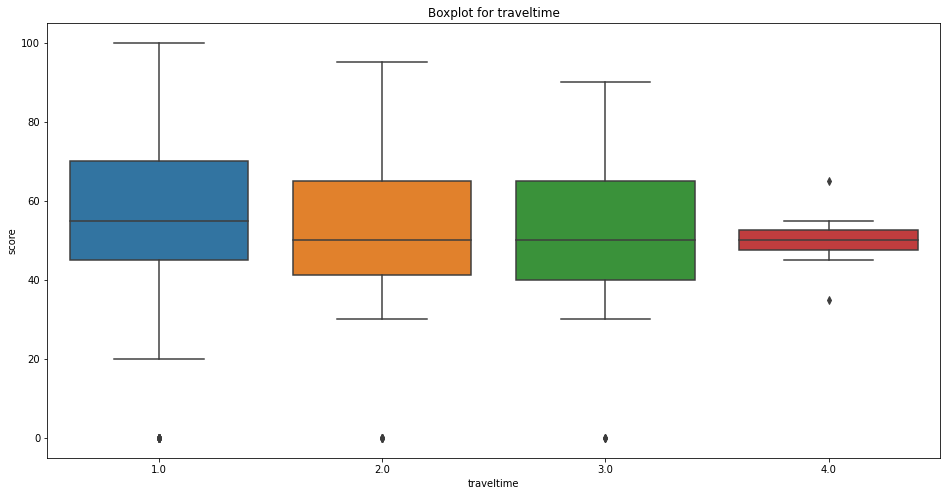

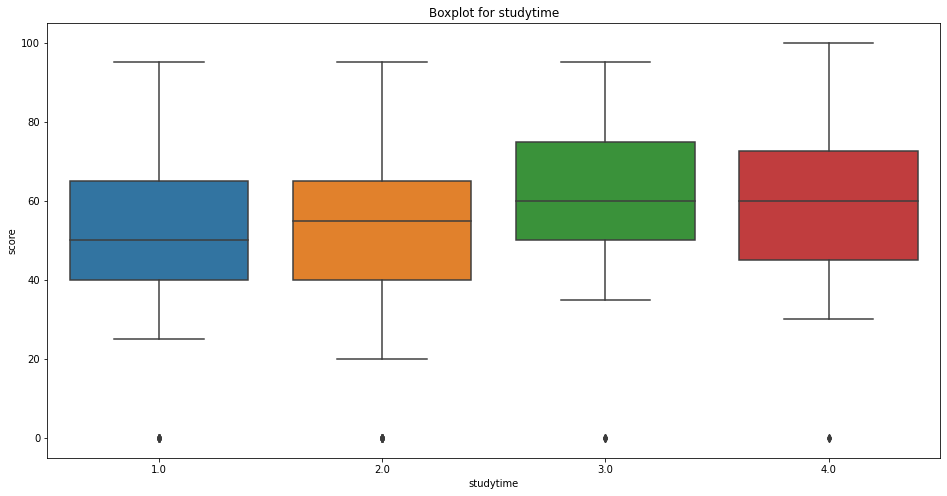

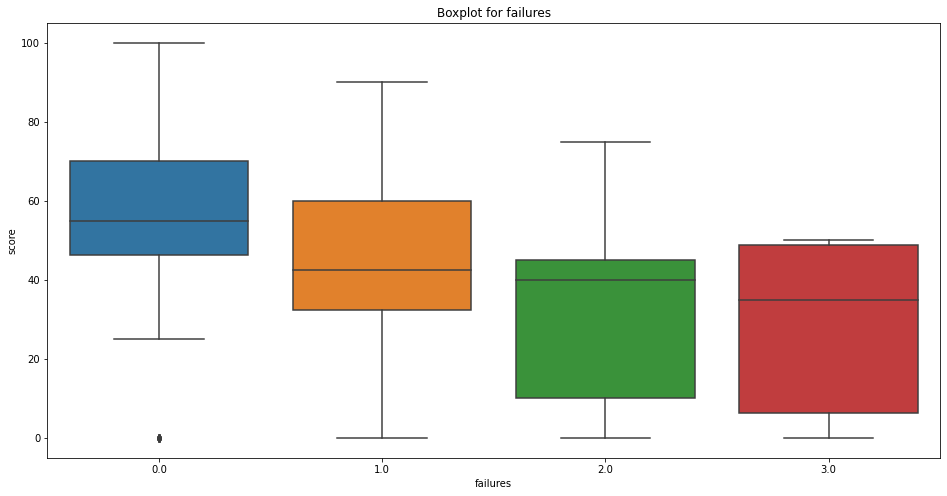

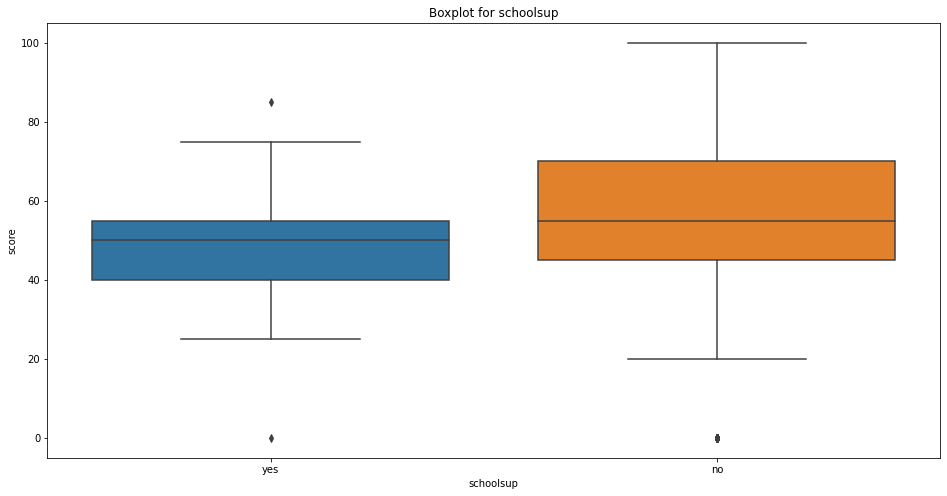

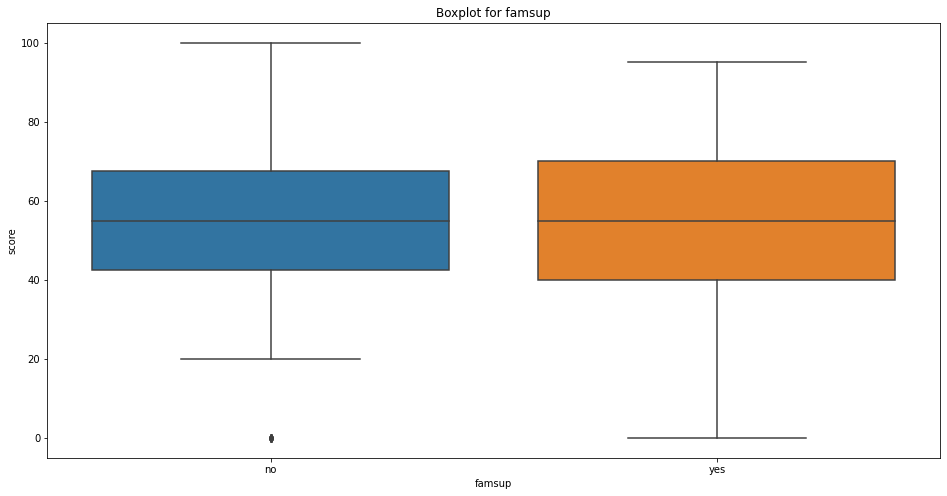

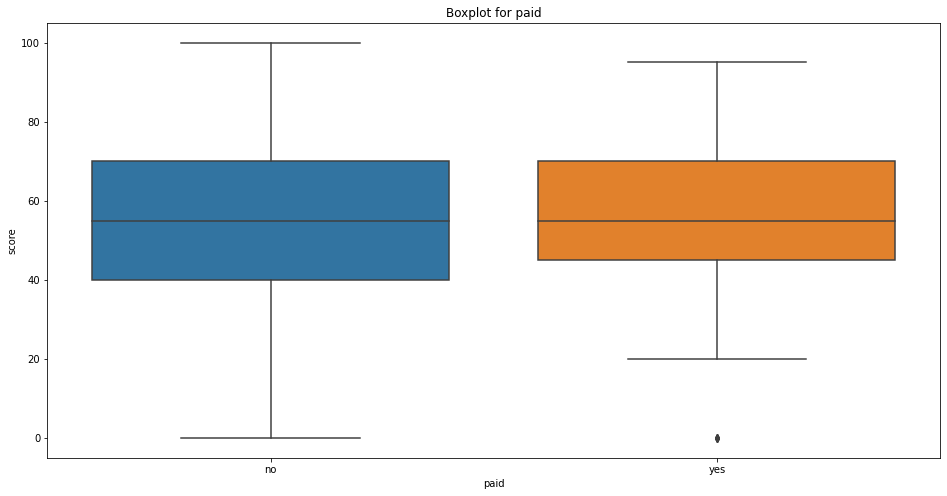

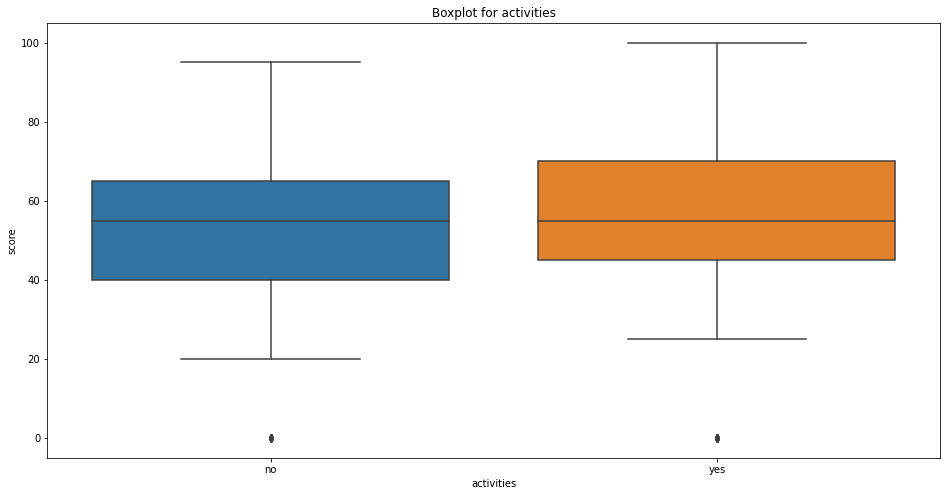

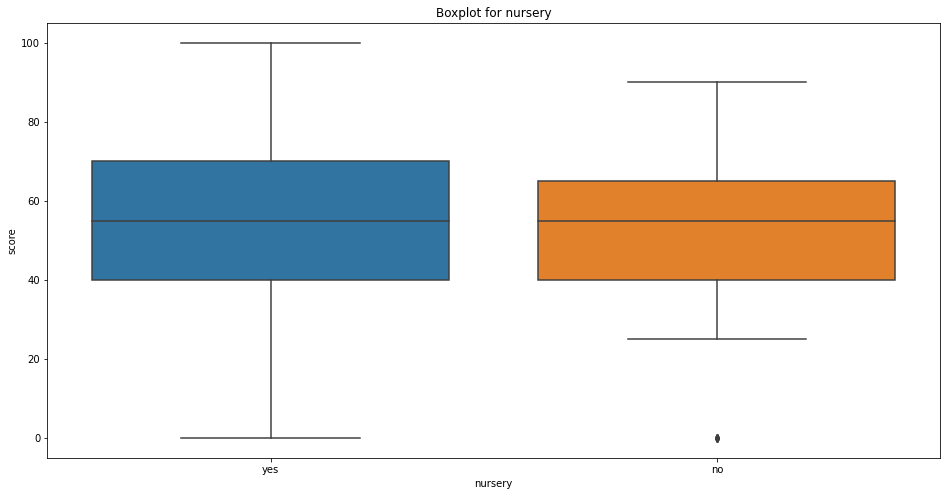

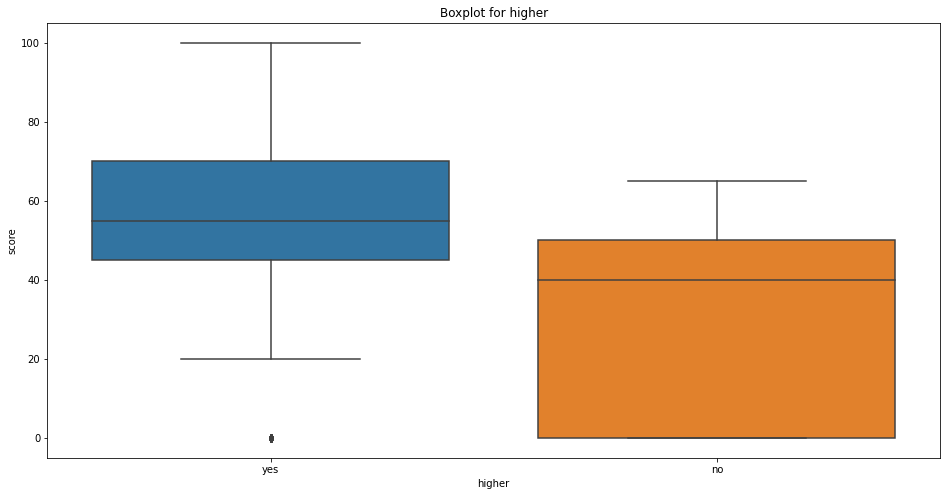

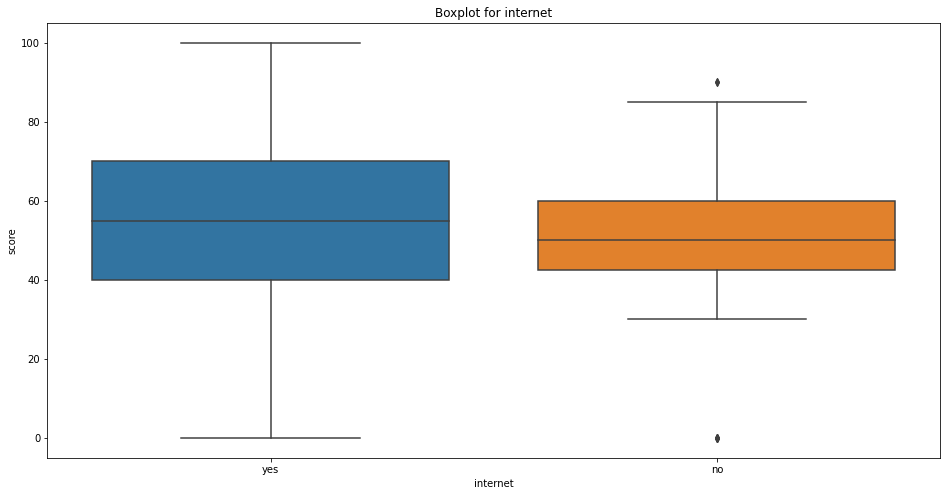

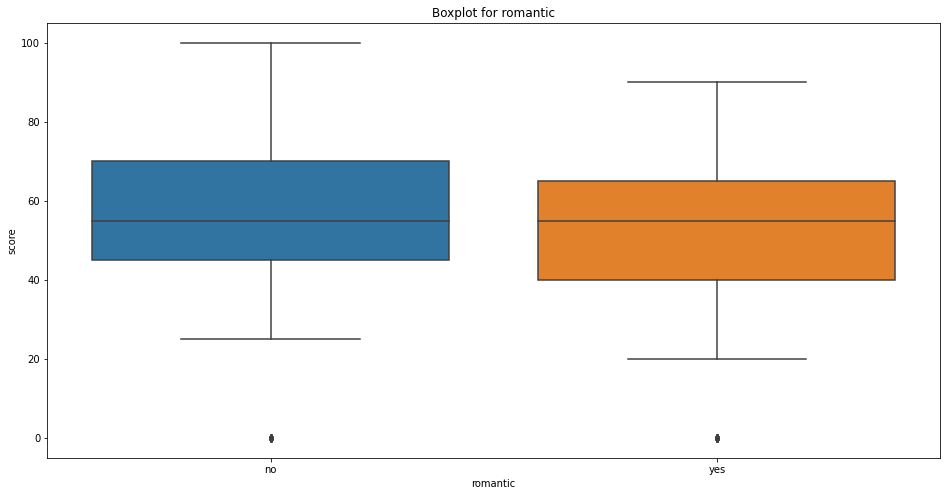

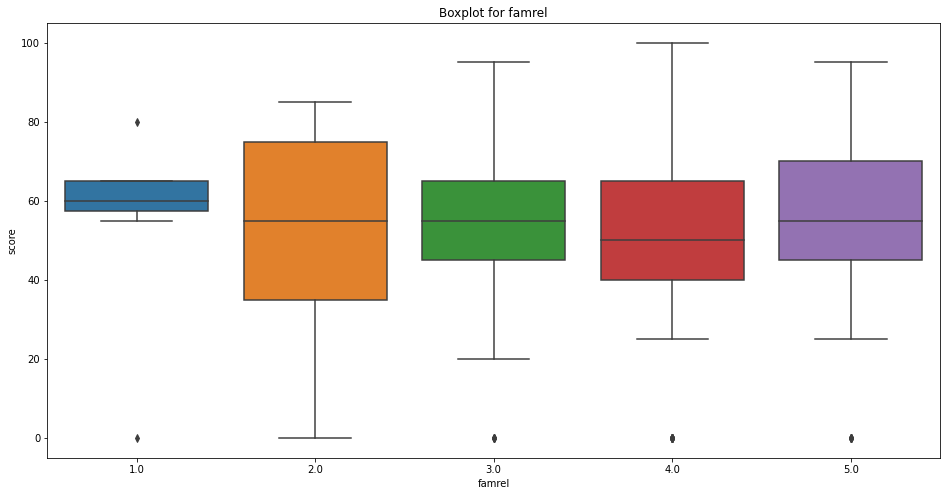

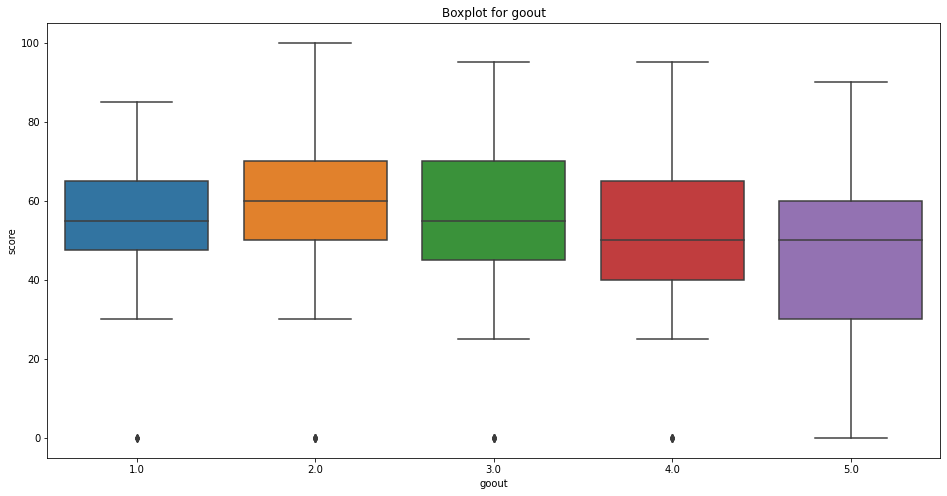

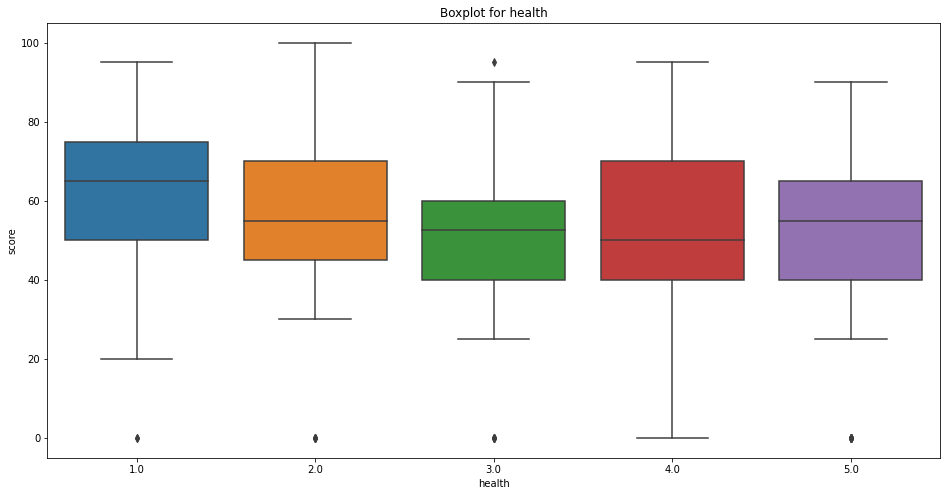

In [23]:
get_boxplot(stud_work)

### Выводы
1. Проведен первичный анализ данных, который показал, что столбцы в основном все данные являются категориальными.(Кроме столбцов age, absences и score). Это связано с тем, что цифрами зашифрованы определенные категориальные данные.
2. Проведен анализ данных на наличие выбросов. При обнаружении выбросы были заменены на определенные значения.
3. Проведен анализ категориальных данных на количество уникальных значений. Получены соответствующие таблицы. 
4. Преобразованы данные в столбцах Mjob и Fjob для проведения корреляционного анализа.
5. Проведен корреляционный анализ. Выявлена корреляционная зависимость между столбцами studytime и studytime, granular. Исключен столбец studytime, granular. Выявлено отсутствие корреляционной зависимости между столбцом freetime и score. Столбец freetime исключен из модели. 
#### Учитывая корреляционные зависимости, графики boxplot и количество наблюдений для дальнейшей работы оставляем столбцы age, Medu, failures.


In [24]:
columns_for_model = ['age','Medu', 'failures','score']
students_model = stud_work[columns_for_model]

## Модель для дальнейшей работы

In [25]:
print(students_model.head())

   age  Medu  failures  score
0   18   4.0       0.0   30.0
1   17   1.0       0.0   30.0
2   15   1.0       3.0   50.0
3   15   4.0       0.0   75.0
4   16   3.0       0.0   50.0


## Вывод 2: количество информации для дальнейшей работы связано с точностью работы модели.   